<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

Answer: 

Potentail questions:

- Can breast cancer be accurately diagnosed based on patient age, tumor size, cell structure, and biopsy results?

- Can sub-types of breast cancer be identified based on measurement parameters. 

- Can we use machine learning to develop a personalized treatment plan for breast cancer patients based on their individual characteristics?

Actual question:
- Can patterns in breast cancer data be used to distinguish between benign and malignant tumors?

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

### Attribute Information: (class attribute has been moved to last column)

- Sample code number: id number
- Clump Thickness: 1 - 10
- Uniformity of Cell Size: 1 - 10
- Uniformity of Cell Shape: 1 - 10
- Marginal Adhesion: 1 - 10
- Single Epithelial Cell Size: 1 - 10
- Bare Nuclei: 1 - 10
- Bland Chromatin: 1 - 10
- Normal Nucleoli: 1 - 10
- Mitoses: 1 - 10
- Class: (2 for benign, 4 for malignant)

Missing attribute values: 16
- There are 16 instances in Groups 1 to 6 that contain a single missing (i.e., unavailable) attribute value, now denoted by "?".  

Class distribution: Benign: 458 (65.5%); Malignant: 241 (34.5%)

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries
# !pip install mlxtend
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [2]:
# Load and read data
# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets

In [3]:
# Check input variables, X 
X

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [4]:
# Check target variable, y
y

,Class
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
# Number of features (using shape for rows and columns)
X.shape

(699, 9)

In [6]:
# Datatype
X.dtypes

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
dtype: object

In [7]:
# Domains, Intervals - Describe to determine basic stats
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_epithelial_cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


In [8]:
# Check for missing values
X.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

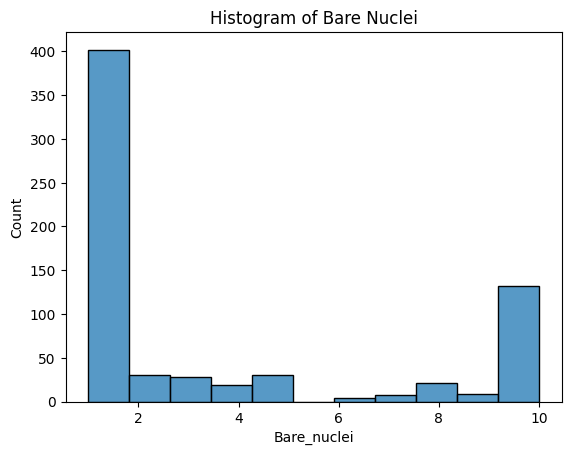

In [9]:
# Histogram plot of Bare_nuclei
sns.histplot(x='Bare_nuclei', data=X)
plt.title('Histogram of Bare Nuclei')
plt.show()

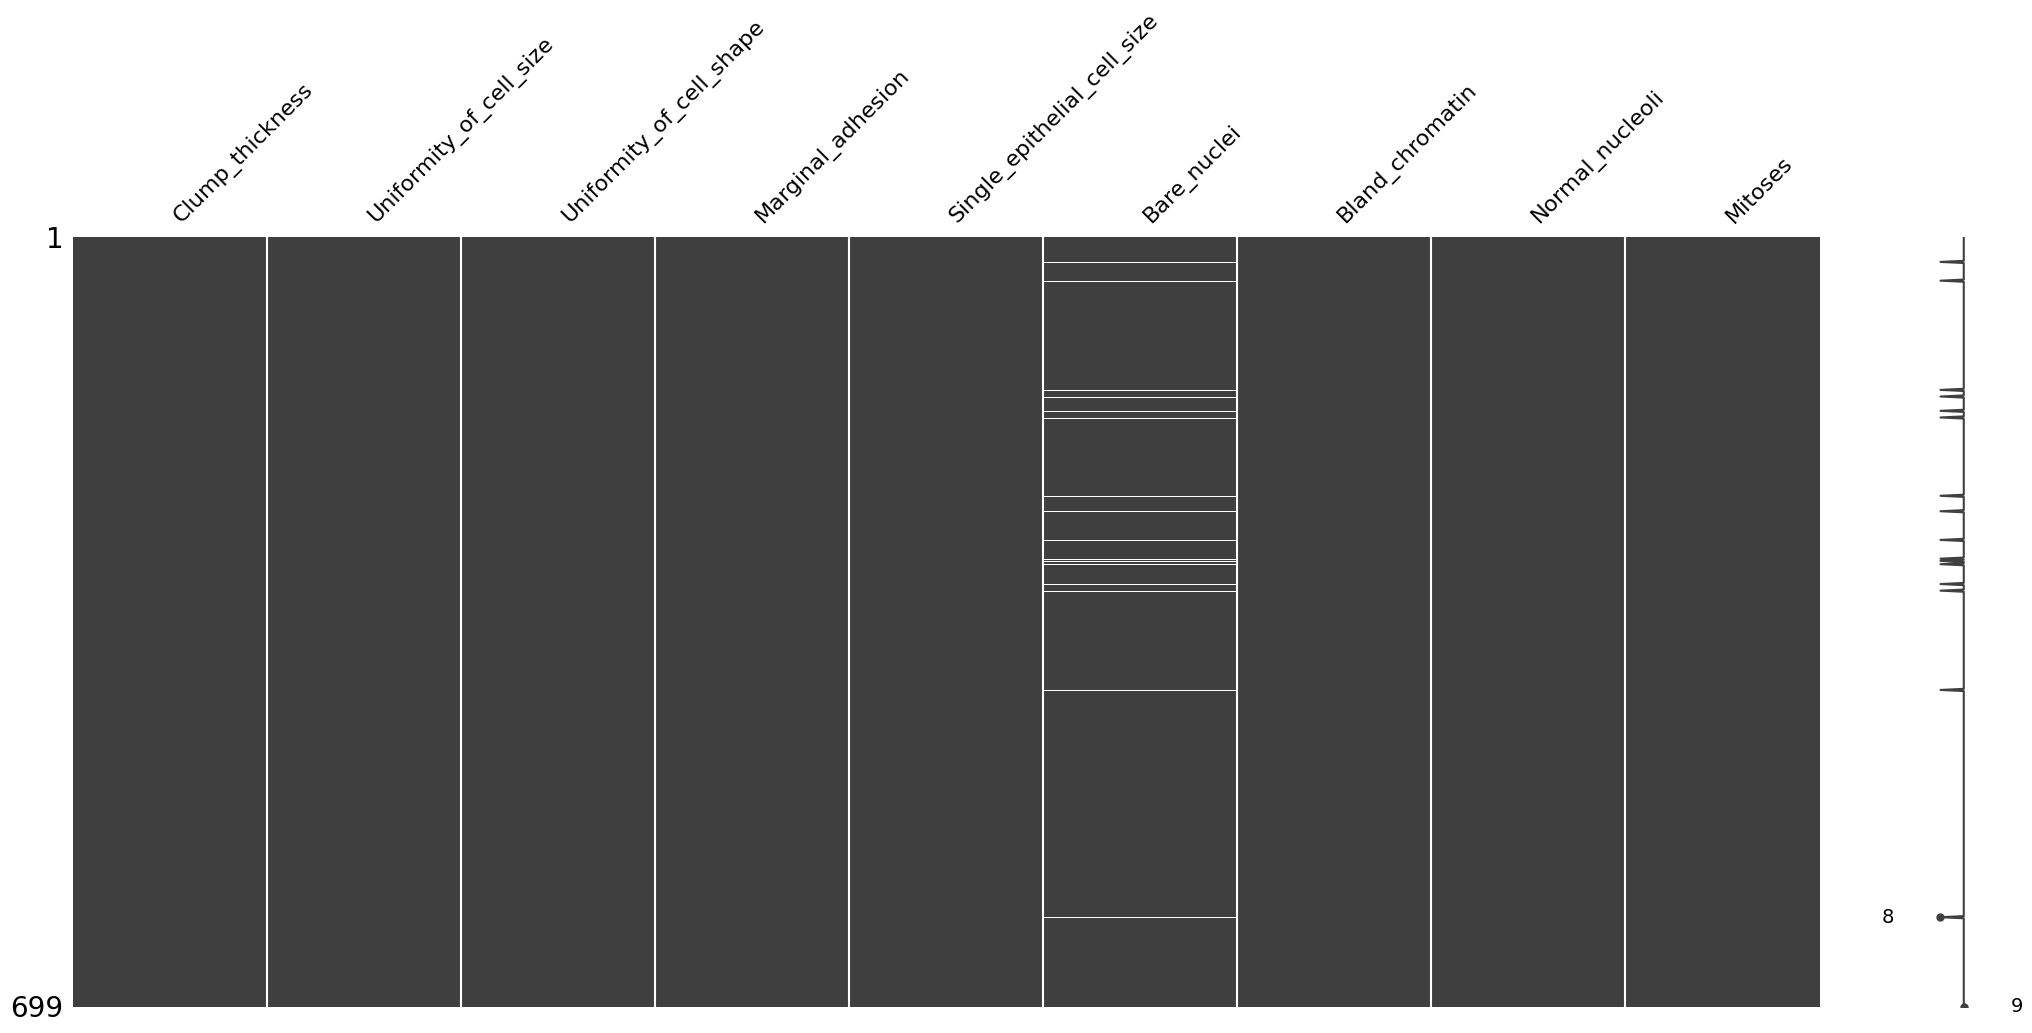

In [10]:
# Distribution of missing values within the dataset
import missingno as msno
msno.matrix(X)
plt.show()

There are missing values observed in the "Bare_nuclei" column. Upon further examination, it has been decided to handle this by replacing the missing values with the mode within the "Bare_nuclei" column.

In [11]:
# Mode imputation for missing values
X.loc[:, 'Bare_nuclei'] = X['Bare_nuclei'].fillna(X['Bare_nuclei'].mode().iloc[0])

In [12]:
# Recheck missing values
X.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64

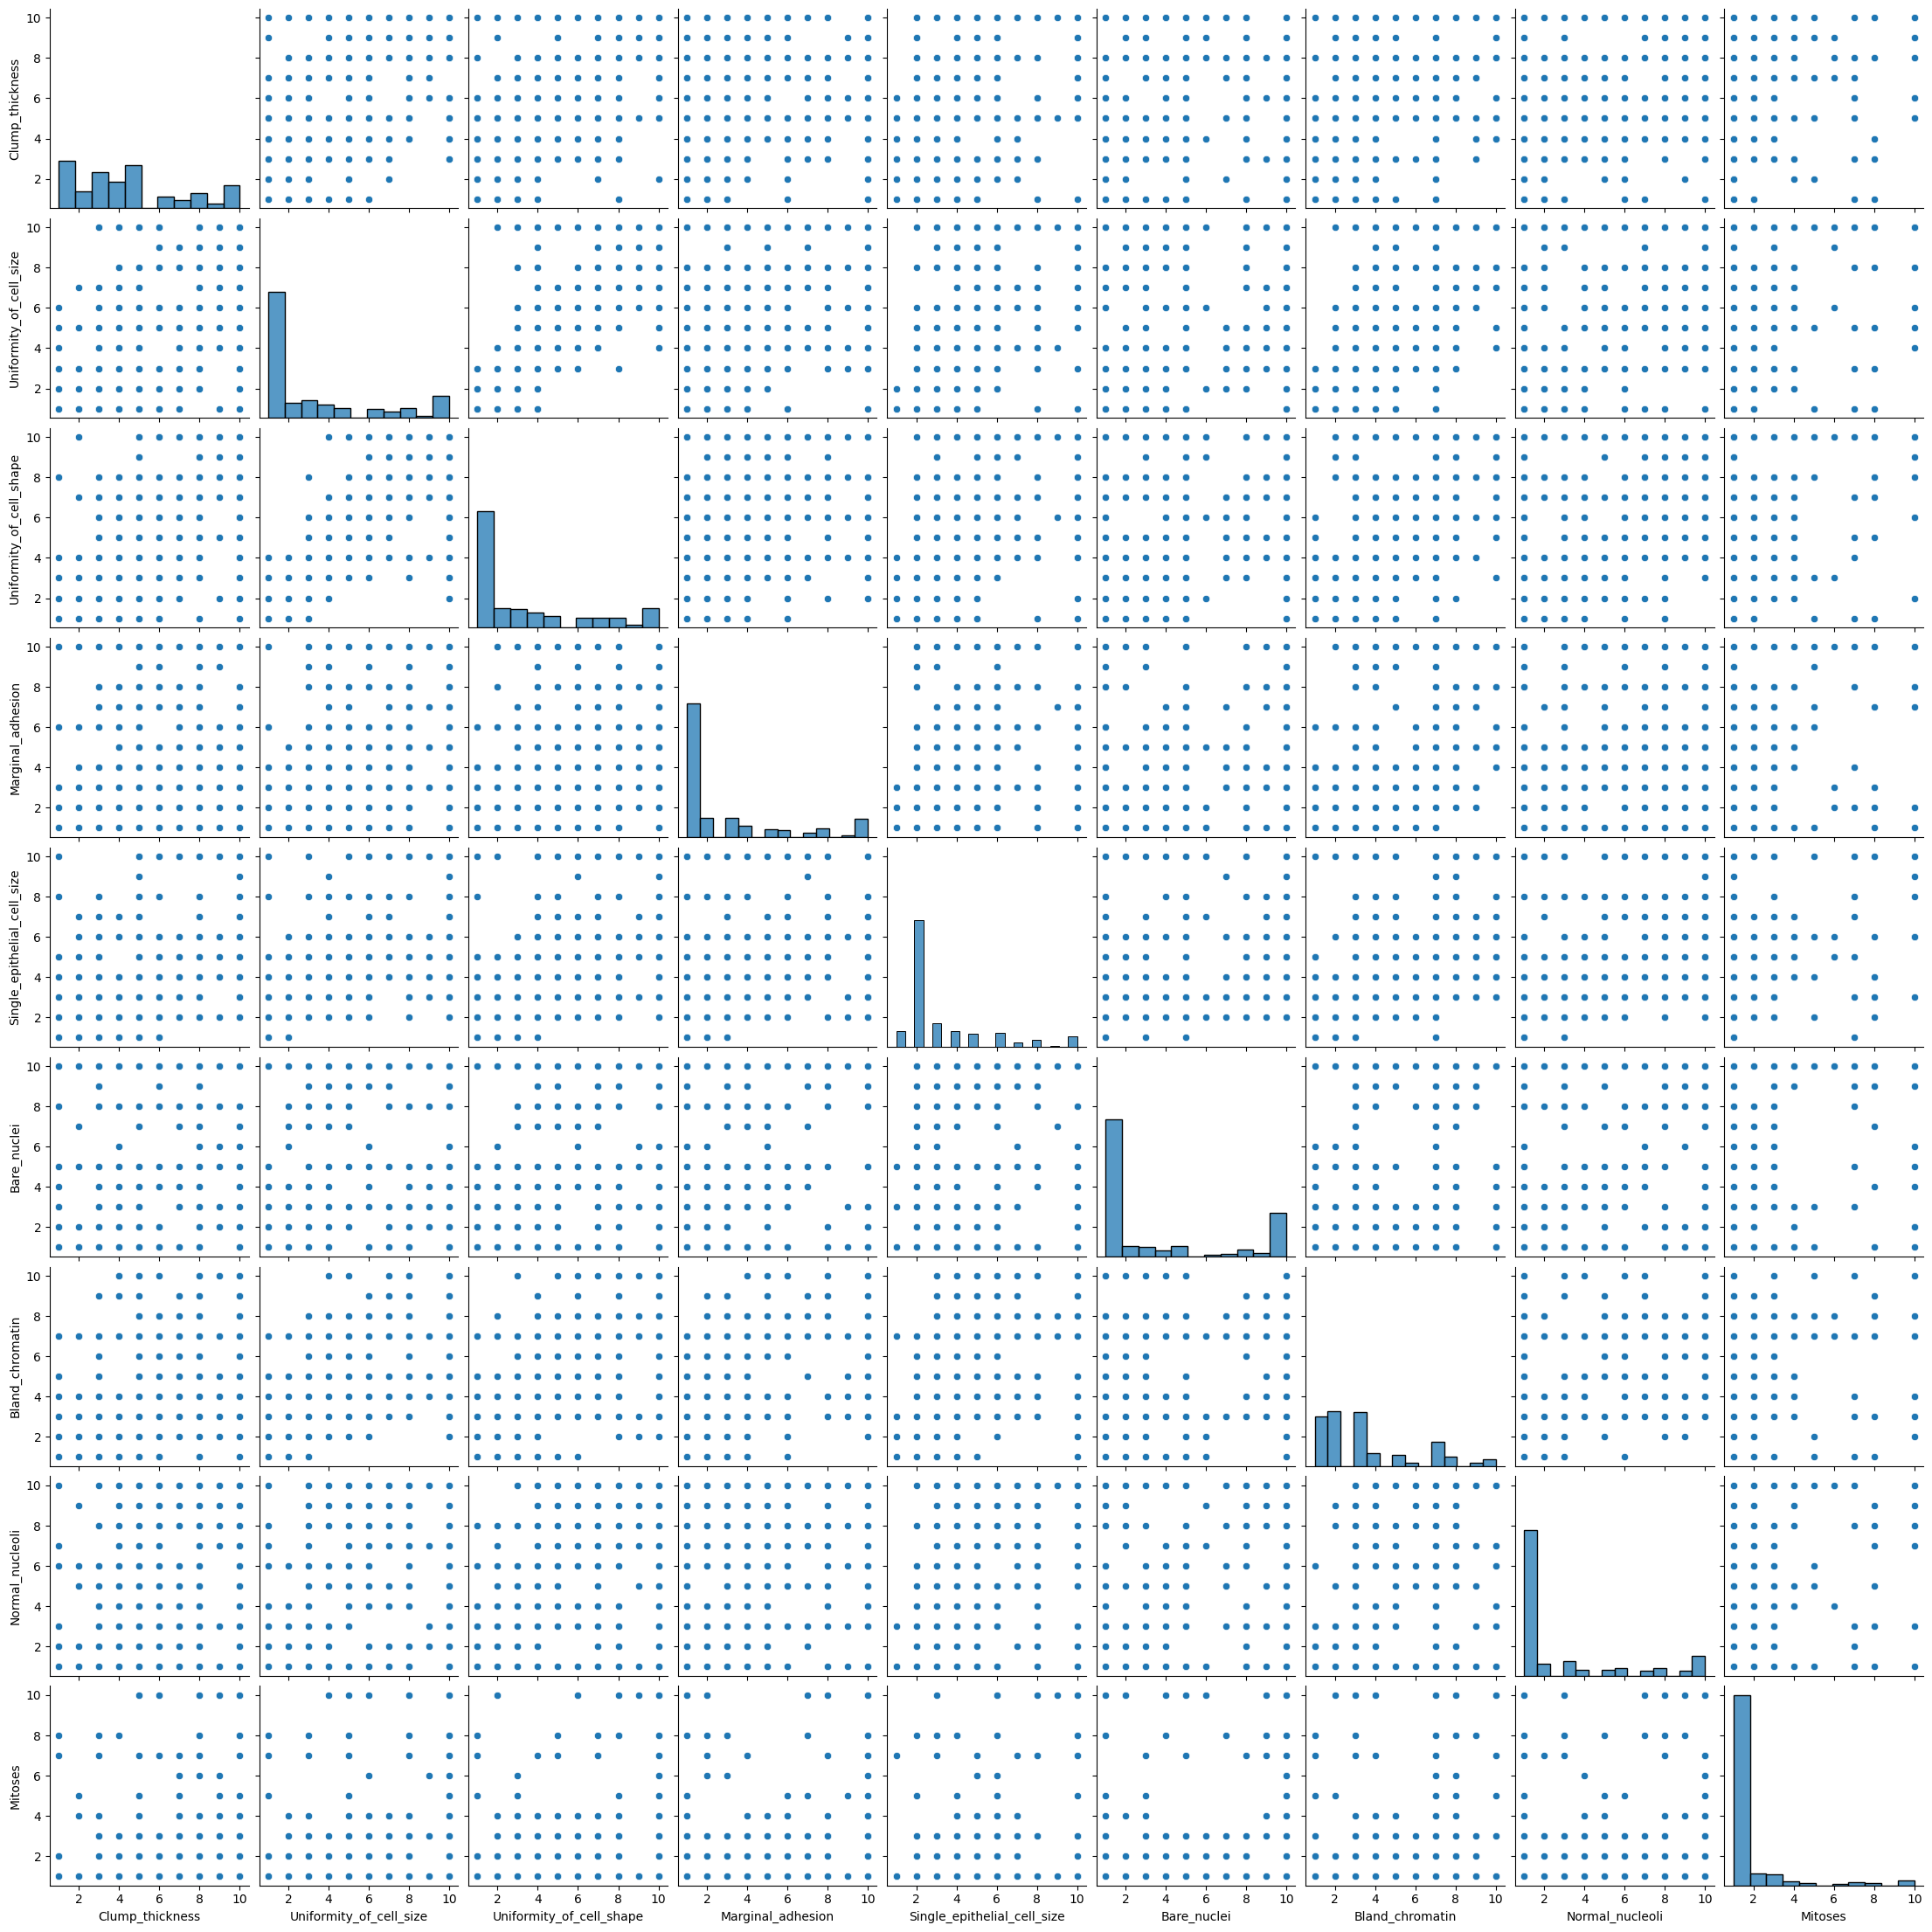

In [13]:
# Domains, Intervals - Pairplot to determine data distribution
sns.pairplot(X);

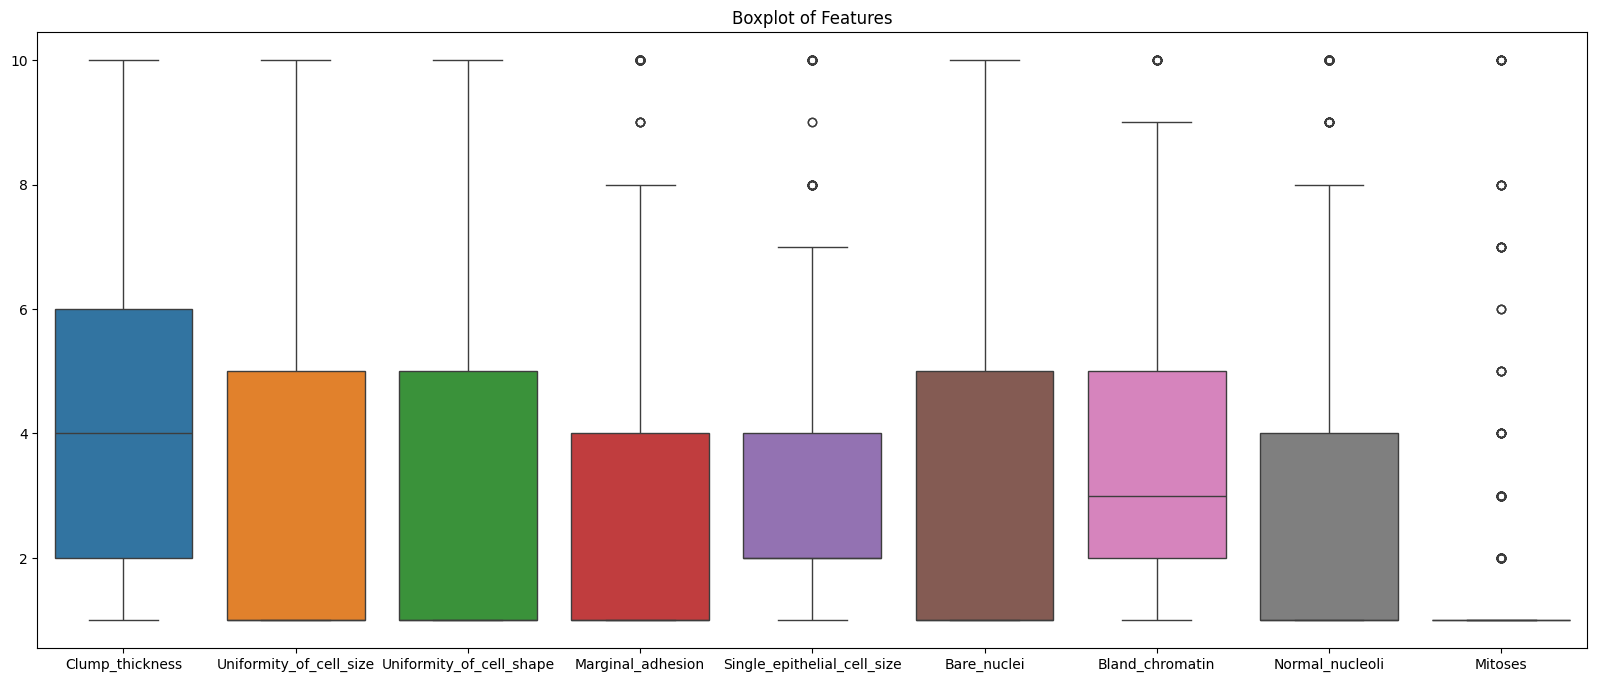

In [14]:
# Outliers - Boxplot of features
plt.figure(figsize=(20, 8))
sns.boxplot(data=X)
plt.title('Boxplot of Features')
plt.show()

Answer:
- The dataset consists of 699 rows and 9 columns, representing the 9 predictor features. 
- The data types include one float and the rest are integers, all of which are numerical. 
- Notably, there are significant outliers in the Mitoses feature, with the majority of the data below 2.
- Approximately 2% of the Bare_nuclei values were missing, and these were imputed with the mode value. This decision was made because the distribution of null values within the dataset appeared to be random and did not follow a normal distribution centered around the mean.
- No coded content was identified within the dataset.

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [15]:
# Target variable class distribution (Benign: 2; Malignant: 4)
y.value_counts()/len(y)

Class
2        0.655222
4        0.344778
Name: count, dtype: float64

In [16]:
# Replace values in target variable to 0 and 1, that is 2(Benign)=0 and 4(Malignant)=1
y.loc[:, 'Class'] = y['Class'].replace({2: 0, 4: 1})
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
694,0
695,0
696,1
697,1


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [17]:
# Input variables, X
X.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses'],
      dtype='object')

In [18]:
# Output variable, y
y.columns

Index(['Class'], dtype='object')

In [19]:
# Type of target variable
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [20]:
# Convert y from DataFrame to Series
y = y.squeeze()
print(type(y))

<class 'pandas.core.series.Series'>


Answer: 
- The target variable, formatted in binary, plays a pivotal role in a classification task, identifying it as a type of supervised model.

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [21]:
# Number of observations (rows)
X.shape[0]

699

In [22]:
# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the class distribution in the original and split datasets
print("Original class distribution:")
print(y.value_counts(normalize=True))

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Original class distribution:
Class
0    0.655222
1    0.344778
Name: proportion, dtype: float64

Class distribution in training set:
Class
0    0.654741
1    0.345259
Name: proportion, dtype: float64

Class distribution in testing set:
Class
0    0.657143
1    0.342857
Name: proportion, dtype: float64


# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

Summary: Bagging is a short form of bootstrap aggregating. It is an ensemble technique that divides a dataset into n samples with replacement. Each of the divided n samples are then trained separately into n separate machine learning models. Then the output of all the separate models are combined into one single output by using voting.

In [23]:
# Solution for 8, 9, 10, 11
# Bagging using SVC classifier - Model 1
clf1 = BaggingClassifier(estimator=SVC(), 
                         n_estimators=10,
                         random_state=0,
                         max_samples=0.8,
                         max_features=0.8).fit(X_train, y_train)
print(clf1.score(X_test, y_test))

0.9642857142857143


In [24]:
# Bagging using DecisionTree classifier - Model 2
clf2 = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                         n_estimators=10,
                         random_state=0,
                         max_samples=0.8,
                         max_features=0.4).fit(X_train, y_train)
print(clf2.score(X_test, y_test))

0.9642857142857143


In [25]:
# Bagging using KNeighbors classifier - Model 3
clf3 = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), 
                         n_estimators=10,
                         random_state=0,
                         max_samples=1.0,
                         max_features=0.8).fit(X_train, y_train)
print(clf3.score(X_test, y_test))

0.9642857142857143


In [26]:
# Bagging using LogisticRegression classifier - Model 4 (best performing model)
from sklearn.linear_model import LogisticRegression
clf4 = BaggingClassifier(estimator=LogisticRegression(penalty='l2',
                                                     class_weight='balanced',
                                                     solver='liblinear'), 
                         n_estimators=10,
                         random_state=0,
                         max_samples=1.0,
                         max_features=0.3).fit(X_train, y_train)
print("Accuracy:", clf4.score(X_test, y_test))

# Compute the AUC score
auc_score = roc_auc_score(y_test, clf4.predict_proba(X_test)[:, 1])
print(f"AUC Score: {auc_score}")

Accuracy: 0.9714285714285714
AUC Score: 0.9916213768115941


The model's accuracy increased from the baseline to ~97% and the AUC score increased from the baseline to ~99%.

The baseline results (minimum) are:
- Accuracy = 0.9667
- ROC AUC = 0.9614

In [27]:
# Not requested as part of the labs
# Mixing Models Example - Max Voting Ensemble

from sklearn.model_selection import GridSearchCV

### k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_

### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_

### Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=123,
solver='liblinear', penalty='l2', max_iter=5000)
C = np.logspace(1, 4, 10)
params_lr = dict(C=C)

lr_gs = GridSearchCV(log_reg, params_lr, cv=5, verbose=0)
lr_gs.fit(X_train, y_train)
lr_best = lr_gs.best_estimator_

# Combine all three Voting Ensembles
from sklearn.ensemble import VotingClassifier

estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg',
lr_best)]
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)
print("knn_gs.score: ", knn_best.score(X_test, y_test))
print("rf_gs.score: ", rf_best.score(X_test, y_test))
print("log_reg.score: ", lr_best.score(X_test, y_test))
print("ensemble.score: ", ensemble.score(X_test, y_test))

knn_gs.score:  0.9428571428571428
rf_gs.score:  0.95
log_reg.score:  0.95
ensemble.score:  0.9428571428571428


In [28]:
# Not requested as part of the labs
# Mixing Models Example - Averaging Voting Ensemble

### k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
knn_gs_predictions = knn_gs.predict(X_test)

### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
rf_gs_predictions = rf_gs.predict(X_test)

### Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=123,
solver='liblinear', penalty='l2', max_iter=5000)
C = np.logspace(1, 4, 10)
params_lr = dict(C=C)
lr_gs = GridSearchCV(log_reg, params_lr, cv=5, verbose=0)
lr_gs.fit(X_train, y_train)
lr_best = lr_gs.best_estimator_
log_reg_predictions = lr_gs.predict(X_test)

# Combine all three by averaging the Ensembles results
average_prediction = (log_reg_predictions + knn_gs_predictions + rf_gs_predictions)/3.0

# Alternatively combine all through using VotingClassifier with voting='soft' parameter
# Combine all three Voting Ensembles
from sklearn.ensemble import VotingClassifier

estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', lr_best)] 
ensemble = VotingClassifier(estimators, voting='soft') 
ensemble.fit(X_train, y_train)
print("knn_gs.score: ", knn_gs.score(X_test, y_test))
print("rf_gs.score: ", rf_gs.score(X_test, y_test))
print("log_reg.score: ", lr_gs.score(X_test, y_test))
print("ensemble.score: ", ensemble.score(X_test, y_test))

knn_gs.score:  0.9428571428571428
rf_gs.score:  0.95
log_reg.score:  0.95
ensemble.score:  0.9428571428571428




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



